In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')



from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"
data = pd.read_pickle(data_path)

In [5]:
physics_labels = ['Physics, Applied',
                  'Physics, Fluids & Plasmas',
                  'Physics, Atomic, Molecular & Chemical',
                  'Physics, Multidisciplinary',
                  'Physics, Condensed Matter',
                  'Physics, Nuclear',
                  'Physics, Particles & Fields',
                  'Physics, Mathematical']

In [6]:
physics_data = data[data["Label"].isin(physics_labels)]
article_df = None

In [20]:
physics_applied_phy = physics_data[physics_data.Label == "Physics, Applied"]
physics_applied_phy = physics_applied_phy.sort_values(by="PubYear")
vectorizer1 = CountVectorizer()
vectorized_words1 = vectorizer1.fit_transform(physics_applied_phy.title_without_stopwords)

In [21]:
row_counts = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts =  list(row_counts["count"])

In [14]:
N = 100

vocab = vectorizer1.vocabulary_
rev_vocab = {index:word for word,index in vocab.items()}
# Highest Frequency words all time
all_time_word_frequencies = vectorized_words1.sum(axis=0).reshape(-1,).tolist()[0]
word_index_with_freq = {index:freq for index,freq in enumerate(all_time_word_frequencies)}

word_with_freq = {rev_vocab[index]:np.log(freq + 1) for index, freq in word_index_with_freq.items()}

sorted_word_with_freq = sorted(word_with_freq.items(), key=operator.itemgetter(1), reverse=True)
top_words_all_corpus = pd.DataFrame(list(sorted_word_with_freq[:N]), columns=["word","frequency"])

In [19]:
# list(top_words_all_corpus["word"])

## laser, electron, quantum, carbon, nanoparticles, 
## semiconductor, spectroscopy, superconducting 

In [28]:
row_counts = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts =  list(row_counts["count"])

In [35]:
row_counts

,PubYear,count
0,1900,123
1,1901,137
2,1902,151
3,1903,160
4,1904,137
5,1905,150
6,1906,131
7,1907,153
8,1908,137
9,1909,181


In [29]:
words = ['laser', 'electron', 'quantum', 'carbon', 'nanoparticles', 
         'semiconductor', 'spectroscopy', 'superconducting']


frequencies = []

for word in words:
    word_index = vocab[word]
    yearly_freq_for_word = []
    index_start = 0
    for i in range(len(row_counts)):
        offset = index_start + counts[i]
        tmp = vectorized_words1[index_start:offset,:]
        yearly_word_freq = tmp.sum(axis=0).reshape(-1,).tolist()[0][word_index]
        
        ## Number of physics articles in the year
        
        yearly_freq_for_word.append(yearly_word_freq)
        index_start = offset
    
    frequencies.append(yearly_freq_for_word)

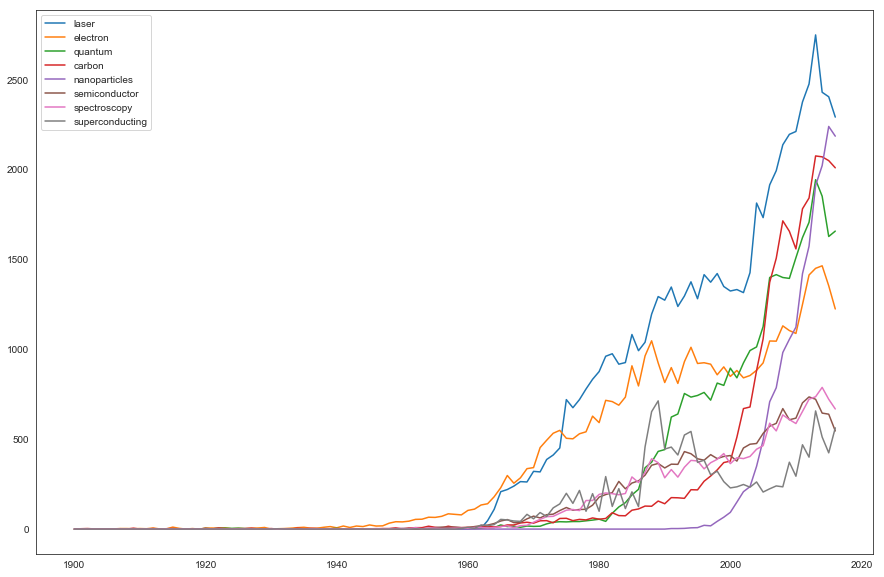

In [47]:
f = plt.figure(figsize=(15,10))

years = list(range(1900,2017))

ax = f.add_subplot(111)
ax.plot(years,frequencies[0], label=words[0])
ax.plot(years,frequencies[1], label=words[1])
ax.plot(years,frequencies[2], label=words[2])
ax.plot(years,frequencies[3], label=words[3])
ax.plot(years,frequencies[4], label=words[4])
ax.plot(years,frequencies[5], label=words[5])
ax.plot(years,frequencies[6], label=words[6])
ax.plot(years,frequencies[7], label=words[7])

ax.legend()